In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
df=pd.read_csv('censusincome.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
df.shape

(32560, 15)

In [40]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [41]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
list1=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [46]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [47]:
df.drop(['Fnlwgt'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0


In [48]:
df.drop(['Education'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0


In [49]:
df.drop(['Native_country'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,13,2,4,0,4,1,0,0,13,0
1,38,4,9,0,6,1,4,1,0,0,40,0
2,53,4,7,2,6,0,2,1,0,0,40,0
3,28,4,13,2,10,5,2,0,0,0,40,0
4,37,4,14,2,4,5,4,0,0,0,40,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Education_num   32560 non-null  int64
 3   Marital_status  32560 non-null  int32
 4   Occupation      32560 non-null  int32
 5   Relationship    32560 non-null  int32
 6   Race            32560 non-null  int32
 7   Sex             32560 non-null  int32
 8   Capital_gain    32560 non-null  int64
 9   Capital_loss    32560 non-null  int64
 10  Hours_per_week  32560 non-null  int64
 11  Income          32560 non-null  int32
dtypes: int32(7), int64(5)
memory usage: 2.1 MB


In [51]:
df.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [52]:
df.skew()

Age                0.558738
Workclass         -0.752280
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

<AxesSubplot:>

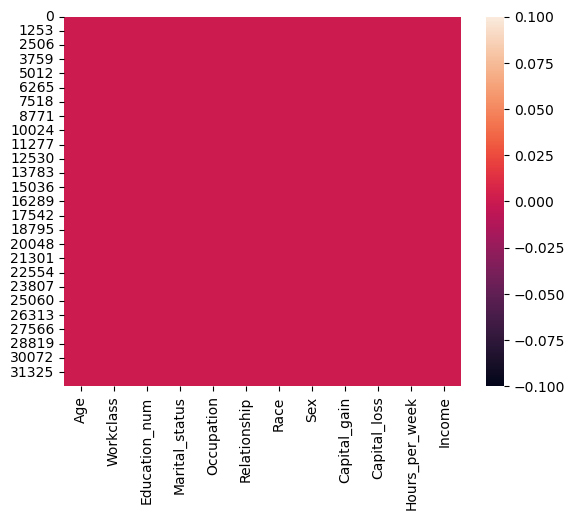

In [53]:
sns.heatmap(df.isnull())

In [54]:
dfcor=df.corr()
dfcor

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.003786,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.234039
Workclass,0.003786,1.000000,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,0.051645
Education_num,0.036527,0.052015,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.335182
Marital_status,-0.266292,-0.064798,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.199295
Occupation,-0.020946,0.255004,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,0.075448
Relationship,-0.263698,-0.090449,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.250924
Race,0.028718,0.049720,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.071853
Sex,0.088832,0.095942,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077674,0.033828,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,0.012231,0.079932,-0.034182,0.017979,-0.061064,0.018902,0.045572,-0.031614,1.000000,0.054256,0.150523


<AxesSubplot:>

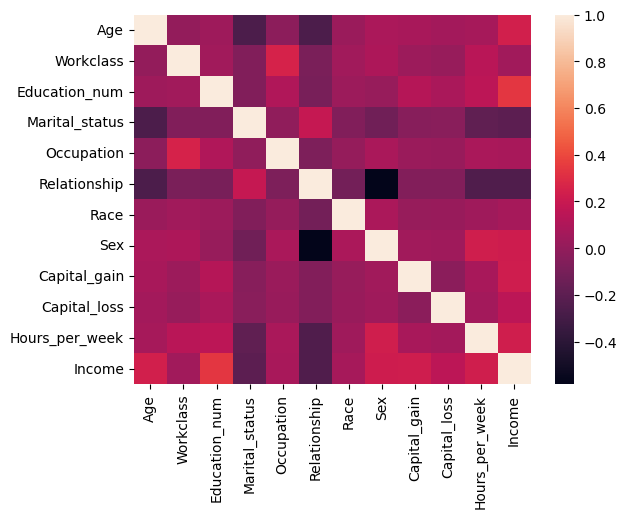

In [55]:
sns.heatmap(dfcor)

<AxesSubplot:>

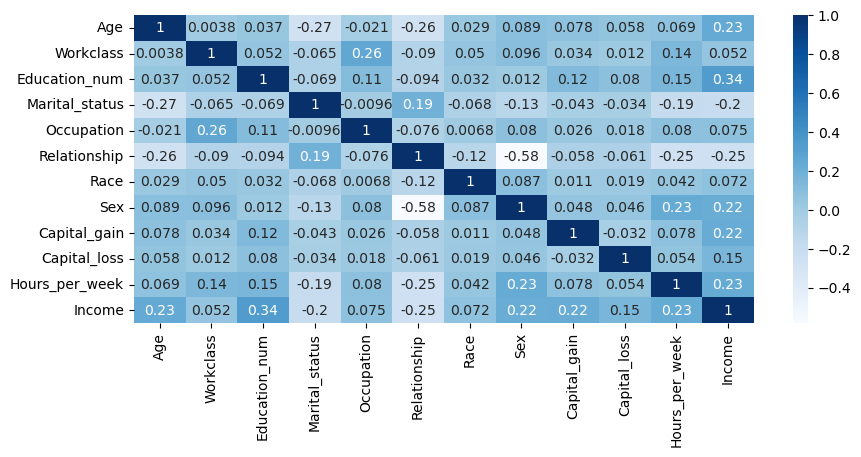

In [56]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

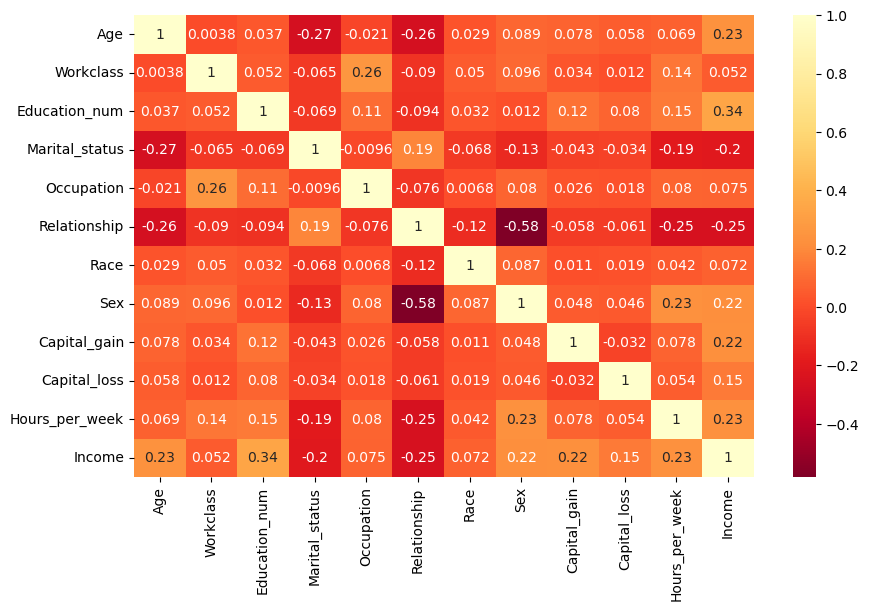

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

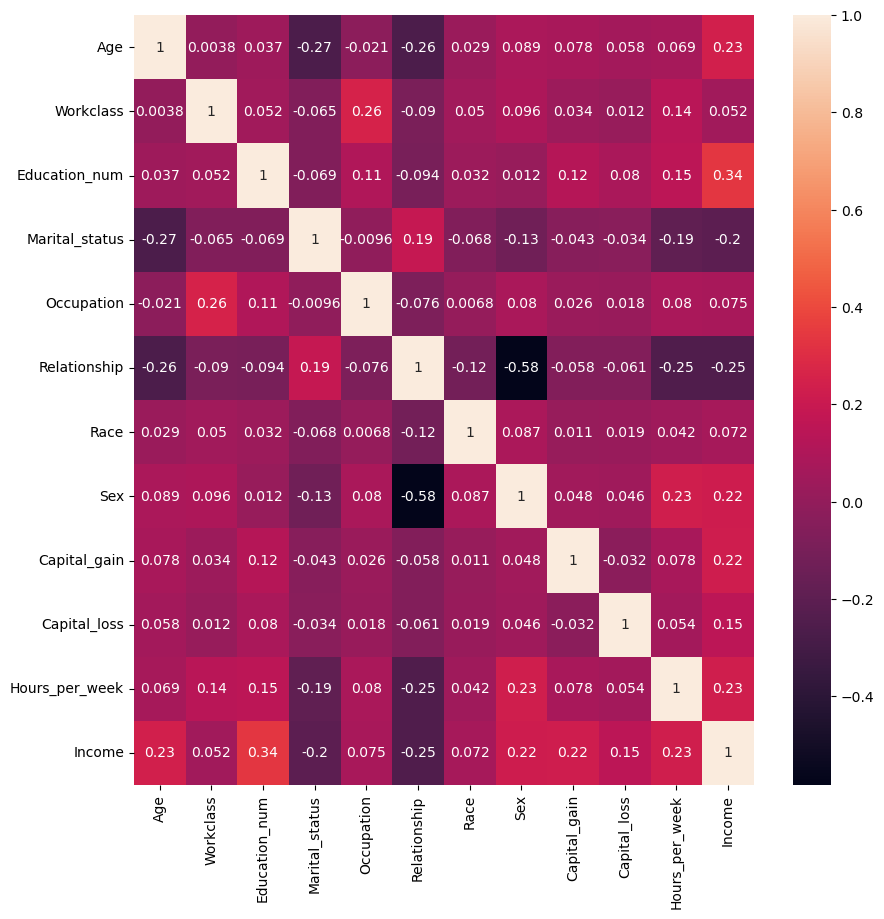

In [58]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [59]:
A=df.iloc[:,:]
A

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,13,2,4,0,4,1,0,0,13,0
1,38,4,9,0,6,1,4,1,0,0,40,0
2,53,4,7,2,6,0,2,1,0,0,40,0
3,28,4,13,2,10,5,2,0,0,0,40,0
4,37,4,14,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,12,2,13,5,4,0,0,0,38,0
32556,40,4,9,2,7,0,4,1,0,0,40,1
32557,58,4,9,6,1,4,4,0,0,0,40,0
32558,22,4,9,4,1,3,4,1,0,0,20,0


In [60]:
x=df.iloc[:,0:-1]
x

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,13,2,4,0,4,1,0,0,13
1,38,4,9,0,6,1,4,1,0,0,40
2,53,4,7,2,6,0,2,1,0,0,40
3,28,4,13,2,10,5,2,0,0,0,40
4,37,4,14,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,12,2,13,5,4,0,0,0,38
32556,40,4,9,2,7,0,4,1,0,0,40
32557,58,4,9,6,1,4,4,0,0,0,40
32558,22,4,9,4,1,3,4,1,0,0,20


In [61]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [63]:
dtc=DecisionTreeClassifier()     
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8165829145728644
[[4779  665]
 [ 649 1071]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5444
           1       0.62      0.62      0.62      1720

    accuracy                           0.82      7164
   macro avg       0.75      0.75      0.75      7164
weighted avg       0.82      0.82      0.82      7164



In [64]:
knn=KNeighborsClassifier()     
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8165829145728644
[[4779  665]
 [ 649 1071]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5444
           1       0.62      0.62      0.62      1720

    accuracy                           0.82      7164
   macro avg       0.75      0.75      0.75      7164
weighted avg       0.82      0.82      0.82      7164



In [65]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7837800111669458
[[5239  205]
 [1344  376]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      5444
           1       0.65      0.22      0.33      1720

    accuracy                           0.78      7164
   macro avg       0.72      0.59      0.60      7164
weighted avg       0.76      0.78      0.74      7164



In [72]:
svc=SVC(kernel='rbf')      # kernel='rdf'------>default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8022054718034618
[[5265  179]
 [1238  482]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5444
           1       0.73      0.28      0.40      1720

    accuracy                           0.80      7164
   macro avg       0.77      0.62      0.64      7164
weighted avg       0.79      0.80      0.77      7164



In [73]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7829424902289224
[[5444    0]
 [1555  165]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5444
           1       1.00      0.10      0.18      1720

    accuracy                           0.78      7164
   macro avg       0.89      0.55      0.53      7164
weighted avg       0.83      0.78      0.71      7164



In [74]:
def dtc_f():
    dtc=DecisionTreeClassifier()     
    dtc.fit(x_train,y_train)
    dtc.score(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print(accuracy_score(y_test,preddtc))
    print(confusion_matrix(y_test,preddtc))
    print(classification_report(y_test,preddtc))

In [75]:
from sklearn.model_selection import cross_val_score


score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77856265 0.77641278 0.78270885 0.77564496 0.78255528]
0.7791769041769042
0.0029792737869232854


In [76]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79361179 0.77856265 0.78255528 0.78347666 0.77948403]
0.7835380835380835
0.005359842594194948


In [77]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80896806 0.81035012 0.81035012 0.81987101 0.82017813]
0.813943488943489
0.004991707531673214


In [78]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[0.83768428 0.84613022 0.84075553 0.84613022 0.84996929]
0.8441339066339066
0.004359665100300515


In [79]:
import numpy as np
s=np.array([37,4,14,2,4,5,4,0,0,0,40])
s

array([37,  4, 14,  2,  4,  5,  4,  0,  0,  0, 40])

In [80]:
s.shape

(11,)

In [81]:
s=s.reshape(1,-1)

In [82]:
s.shape

(1, 11)

In [87]:
predvalue=dtc.predict(s)
predvalue

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [88]:
def testpredict(s):
    s=s.reshape(1,-1)
    print("s.shape is",s.shape)
    predvalue=svc.predict(s)
    print(predvalue)
    

In [89]:
s=np.array([ 58,4,9,6,1,4,4,0,0,0,40])
testpredict(s)

s.shape is (1, 11)
[0]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
